Importing all libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing dataset

In [2]:
#As csv file is zipped, we are using compression='gzip'
pc_hp=pd.read_csv('PostcodeHouseprice.csv.gz',compression='gzip')

Exploratory Data Analysis

In [3]:
pc_hp.head()

,PostCode,Year,Month,number_of_burglaries,avg(price)
0,BS22 9UD,2010,12,328,417500.0
1,BS8 3PD,2010,12,61,988580.0
2,BS15 3AW,2010,12,50,252500.0
3,BS23 2ER,2010,12,50,80000.0
4,BS16 1FG,2010,12,33,545000.0


In [4]:
pc_hp.describe()

,Year,Month,number_of_burglaries,avg(price)
count,1.100338e+06,1.100338e+06,1.100338e+06,1.100338e+06
mean,2.014054e+03,6.400421e+00,1.213375e+00,2.962750e+05
std,2.269317e+00,3.529116e+00,3.646258e+00,2.485780e+05
min,2.010000e+03,1.000000e+00,1.000000e+00,3.024100e+04
25%,2.012000e+03,3.000000e+00,1.000000e+00,1.360000e+05
50%,2.014000e+03,6.000000e+00,1.000000e+00,2.245000e+05
75%,2.016000e+03,1.000000e+01,1.000000e+00,3.700000e+05
max,2.018000e+03,1.200000e+01,5.230000e+02,1.999995e+06


In [5]:
pc_hp.count()

PostCode                1100338
Year                    1100338
Month                   1100338
number_of_burglaries    1100338
avg(price)              1100338
dtype: int64

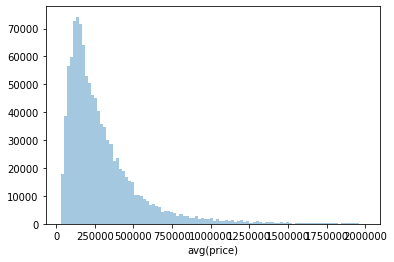

In [6]:
sns.distplot(pc_hp['avg(price)'], kde=False, bins=100)

#Just to observe around where mean would come

Data Pre-Processing for Finding Out if Burglary is Associated with Area of Affluence or Deprivation

In [7]:
#Finding mean avg(price)
#So, it can be used to classify if postcode is area of affluence or not.
#If average price of a postcode will be above mean price, we will classify it as 'area of affluence'
#If average price of a postcode will be below mean price, we will classify it as 'area of deprivation'

mean_of_avg = pc_hp["avg(price)"].mean()
mean_of_avg

296275.0361912145

We are using numeric value '0' for area of affluence, and numeric value '1' for area of deprivation

In [8]:
pc_hp['area_type'] = np.where(pc_hp['avg(price)'] >= mean_of_avg, 0,1)

In [9]:
pc_hp

,PostCode,Year,Month,number_of_burglaries,avg(price),area_type
0,BS22 9UD,2010,12,328,417500.0,0
1,BS8 3PD,2010,12,61,988580.0,0
2,BS15 3AW,2010,12,50,252500.0,1
3,BS23 2ER,2010,12,50,80000.0,1
4,BS16 1FG,2010,12,33,545000.0,0
...,...,...,...,...,...,...
1100333,TS25 1QZ,2018,7,1,32000.0,1
1100334,NW2 6AA,2018,7,1,32000.0,1
1100335,SR8 4QH,2018,7,1,31750.0,1
1100336,NG9 4DR,2018,7,1,31000.0,1


In [10]:
#Dropping PostCode column now because pd.to_numeric function of Pandas would either 'ignore' it or 
#'coerce' it to 'NaN' - both seems irrelevant

pc_hp_new = pc_hp.drop('PostCode', axis=1)

In [11]:
pc_hp_new

,Year,Month,number_of_burglaries,avg(price),area_type
0,2010,12,328,417500.0,0
1,2010,12,61,988580.0,0
2,2010,12,50,252500.0,1
3,2010,12,50,80000.0,1
4,2010,12,33,545000.0,0
...,...,...,...,...,...
1100333,2018,7,1,32000.0,1
1100334,2018,7,1,32000.0,1
1100335,2018,7,1,31750.0,1
1100336,2018,7,1,31000.0,1


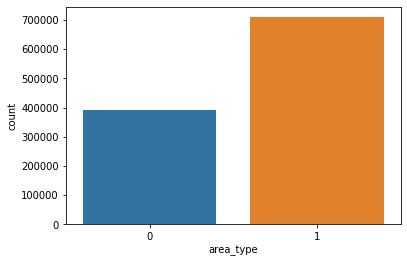

In [12]:
sns.countplot(x='area_type',data=pc_hp_new)

We can see that count of row of burglaries are more in area of deprivation, but its sufficient to finally 
say that number of burglaries are more in area of deprivation, so we are going to get sum of number of burlagaries
of each cases in area of deprivation

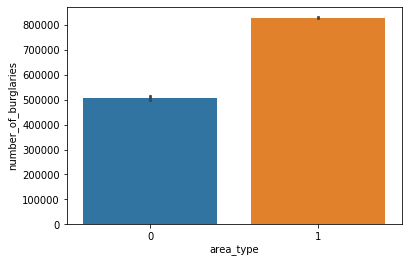

In [13]:
sns.barplot(x='area_type',y='number_of_burglaries',data=pc_hp_new, estimator=np.sum)

Now, we can easily see that, after taking sum of number of burglaries, that indeed yes, number of cases of burglaries are defnitely more in area of deprivation

Also, we are going to use Logistic Regression to be assured of our result

In [14]:
#Training model for Logistic Regression, and importing relevant files thereon

In [15]:
X = pc_hp_new.drop('area_type',axis=1)
y = pc_hp_new['area_type']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
#taking training size as 70% and test 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [18]:
#creating instance of logistic Regression model and Fitting data

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
predictions = logreg.predict(X_test)

In [20]:
#importing classification report and confusion matrix from Scikit-Learn

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [21]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

#Confusion matrix with (R1,C1) as TN, (R1,C2) as FP, (R2,C1) as FN, and (R2,C2) as TP 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117753
           1       1.00      1.00      1.00    212349

    accuracy                           1.00    330102
   macro avg       1.00      1.00      1.00    330102
weighted avg       1.00      1.00      1.00    330102



[[117714     39]
 [    33 212316]]


Thus, it can be easily said that burglary is more closely associated with Area of Deprivation

Now, for the next task of finding out if the number of cases of bruglaries are increasing or decreasing, we are going to use Linear Regression, and with finding coefficient (positive or negative), we could determine if number of burglaries are increasing or decreasing

In [22]:
#As now task is to create LinearRegression and time series, we need time as timedate64(ns) and in column
#So, adding day column, and changing year, month, day to single period column
#Then dropping rest of the columns to create a dataframe with only 'Period' as single column 

pc_hp['Day']='01'
pc_hp_3 =pc_hp.drop(['PostCode', 'avg(price)','area_type','number_of_burglaries'], axis=1)
pc_hp_3['Period']=pd.to_datetime(pc_hp_3)
period=pc_hp_3.drop(['Year','Month','Day'], axis=1)
period

,Period
0,2010-12-01
1,2010-12-01
2,2010-12-01
3,2010-12-01
4,2010-12-01
...,...
1100333,2018-07-01
1100334,2018-07-01
1100335,2018-07-01
1100336,2018-07-01


In [23]:
#Concatenating dataframe with 'Period' as single column with main 'pch_price' dataframe

y=pd.concat([pc_hp,period],axis=1)
y.columns

Index(['PostCode', 'Year', 'Month', 'number_of_burglaries', 'avg(price)',
       'area_type', 'Day', 'Period'],
      dtype='object')

In [24]:
X= pc_hp[['number_of_burglaries','avg(price)']]

In [25]:
y=y['Period']

In [26]:
#Now, applying Linear Regression
from sklearn.linear_model import LinearRegression

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [28]:
linreg=LinearRegression()

In [29]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
linreg.coef_

array([-4.94975047e+13, -3.22532581e+08])

In [32]:
X_train.columns

Index(['number_of_burglaries', 'avg(price)'], dtype='object')

In [33]:
final_df=pd.DataFrame(linreg.coef_,X.columns,columns=['Coefficient'])

In [34]:
final_df

,Coefficient
number_of_burglaries,-4.949750e+13
avg(price),-3.225326e+08


We do not need to fully implement Linear Regression model; with finding coefficient value for 'number_of_burglaries' it can be adjudged if the cases are increasing or decreasing.
And, with the negative coefficient, we can easily state that there's a decrease in the number of burglaries

Next, we are going to some data-pre-processing again for Time Series Analysis

In [35]:
#Again, creating new dataframe with all columns of 'pc_hp'
#and concatenating it with 'period' dataframe with 'Period' as col

new_df=pd.concat([pc_hp,period],axis=1)

In [36]:
new_df

,PostCode,Year,Month,number_of_burglaries,avg(price),area_type,Day,Period
0,BS22 9UD,2010,12,328,417500.0,0,01,2010-12-01
1,BS8 3PD,2010,12,61,988580.0,0,01,2010-12-01
2,BS15 3AW,2010,12,50,252500.0,1,01,2010-12-01
3,BS23 2ER,2010,12,50,80000.0,1,01,2010-12-01
4,BS16 1FG,2010,12,33,545000.0,0,01,2010-12-01
...,...,...,...,...,...,...,...,...
1100333,TS25 1QZ,2018,7,1,32000.0,1,01,2018-07-01
1100334,NW2 6AA,2018,7,1,32000.0,1,01,2018-07-01
1100335,SR8 4QH,2018,7,1,31750.0,1,01,2018-07-01
1100336,NG9 4DR,2018,7,1,31000.0,1,01,2018-07-01


In [37]:
#Dropping irrelevant rest of the column
#Grouping all rows with same period and taking sum to come up with 'number of burglaries' in each month
#FINALLY, creating a dataframe 'ts_data' that could be used for time series analysis

z=new_df.drop(['PostCode','Year','Month','Day', 'avg(price)','area_type'], axis=1)
z1=z.groupby('Period')
ts_data=z1.sum()
ts_data

,number_of_burglaries
Period,
2010-12-01,17000
2011-01-01,20065
2011-02-01,18679
2011-03-01,19501
2011-04-01,17621
...,...
2018-03-01,12988
2018-04-01,12521
2018-05-01,12681


Importing libraries for Time Series Analysis

In [38]:
from matplotlib import pyplot
from pandas import Series
from pandas import datetime
from statsmodels.tsa.stattools import adfuller
from matplotlib.pylab import rcParams

C:\Users\konar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Plotting Times Series graph

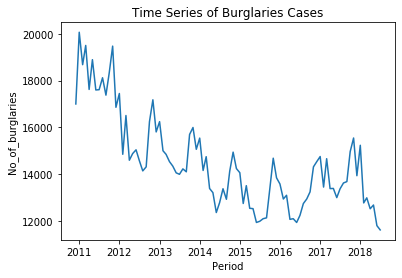

In [39]:
plt.plot(ts_data)
plt.xlabel('Period')
plt.ylabel('No_of_burglaries')
plt.title('Time Series of Burglaries Cases')
plt.rcParams["figure.figsize"] = [12,6]

In [40]:
#Taking rolling mean, and standard deviation

rolmean = ts_data.rolling(10).mean()
rolstd = ts_data.rolling(10).std()

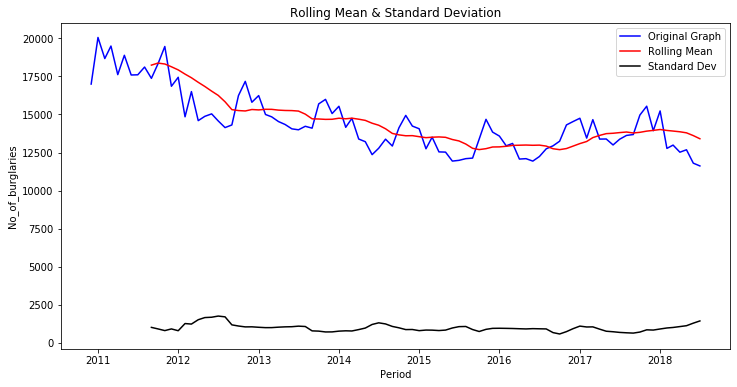

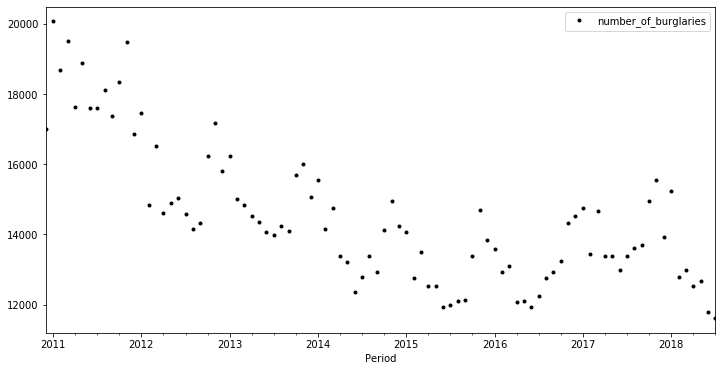

In [41]:
#Plotting Rolling Mean and Standard Deviation

plt.rcParams["figure.figsize"] = [12,6]
orig = plt.plot(ts_data, color='blue',label='Original Graph')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Standard Dev')
plt.legend(loc='best')
plt.xlabel('Period')
plt.ylabel('No_of_burglaries')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
ts_data.plot(style='k.')
pyplot.show()

In [42]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [43]:
#apply adf test on the series
adf_test(ts_data['number_of_burglaries'])

Results of Dickey-Fuller Test:
Test Statistic                 -3.589798
p-value                         0.005959
#Lags Used                     12.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64


As Critical Value(1%), Critical Value(5%), Critical Value(10%) is less than Test Statistic. It is a non-stationary series